In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
from sklearn.datasets import fetch_california_housing
california= fetch_california_housing()

In [21]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [22]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [23]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [24]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [25]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Data Exploration

In [26]:
dataset= pd.DataFrame(california.data, columns=california.feature_names)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [27]:
dataset['price']=california.target

In [28]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [30]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [31]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [32]:
dataset.corr()
#to check for multicoluniarity

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

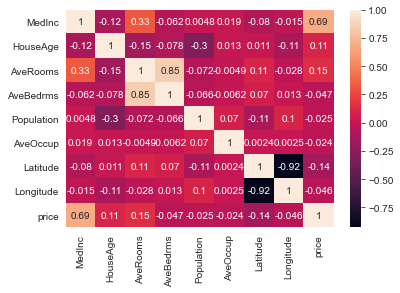

In [33]:
sns.heatmap(dataset.corr(), annot=True)

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

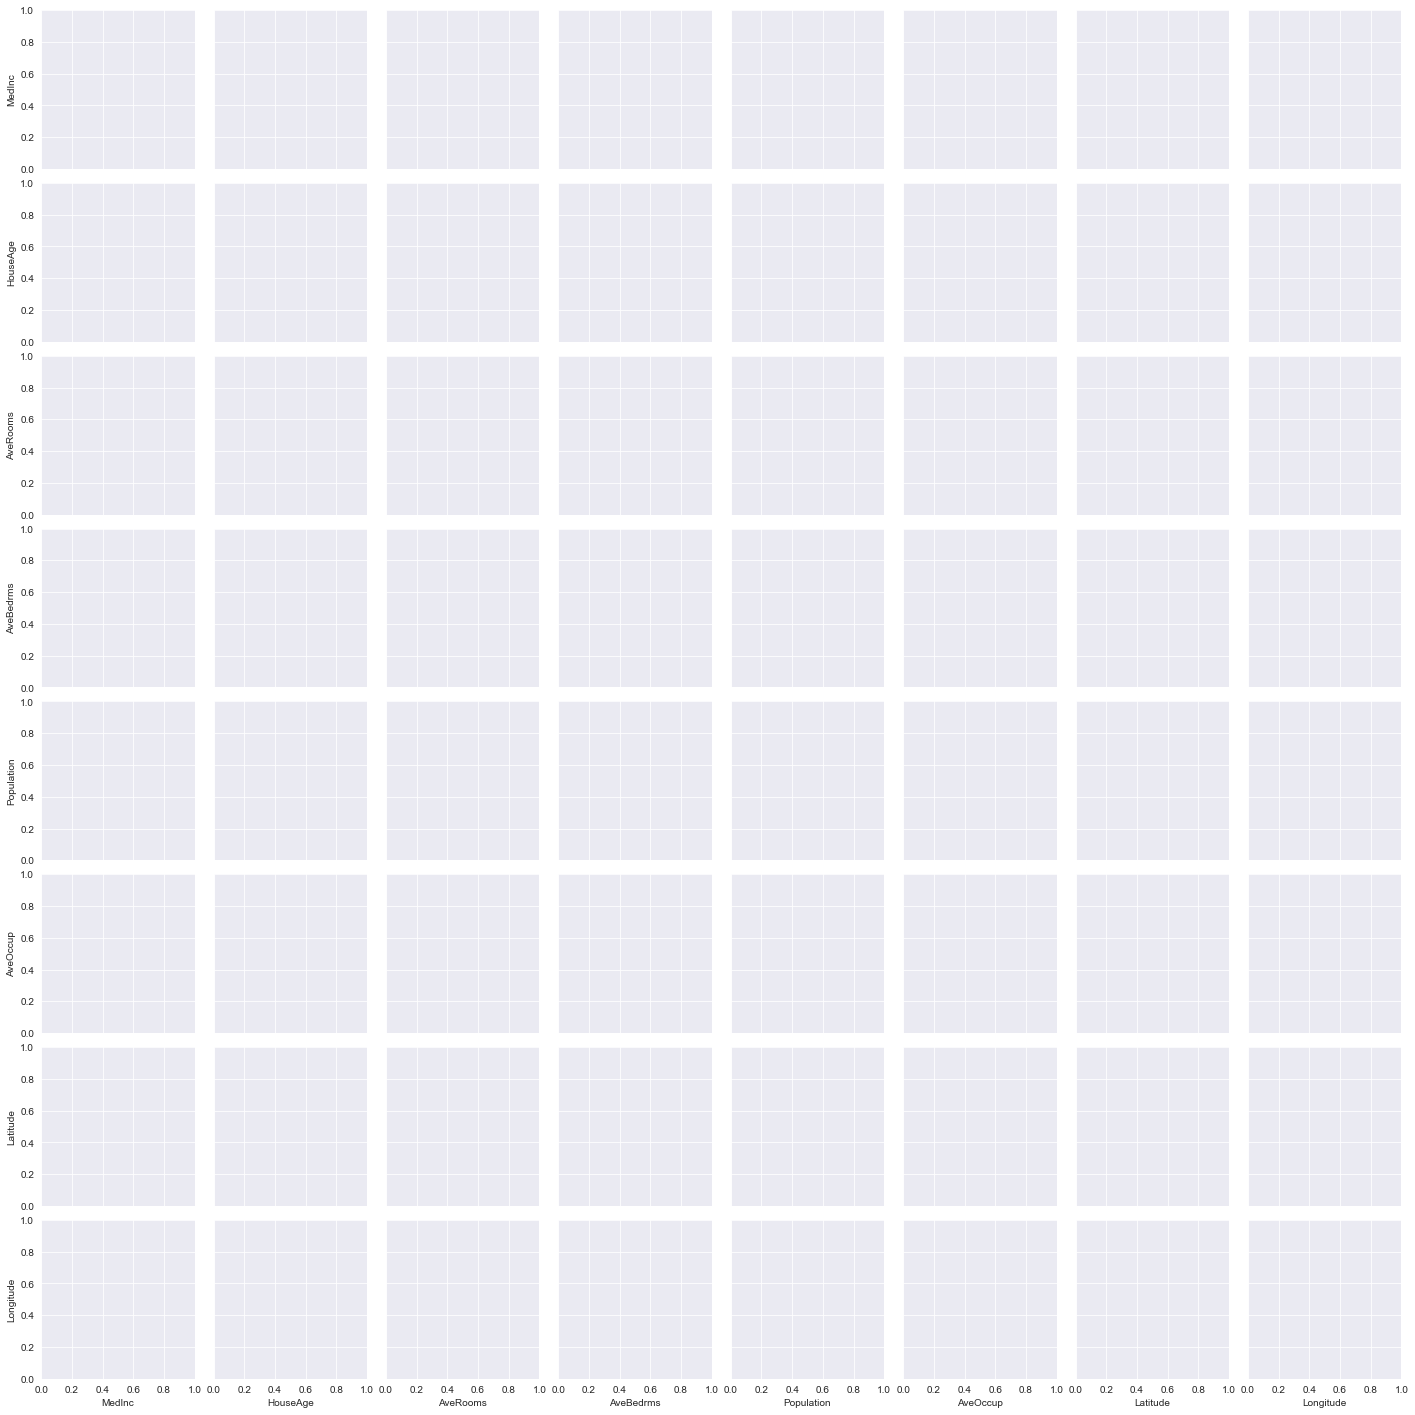

In [34]:
sns.pairplot(dataset, hue='price')

In [ ]:
plt.scatter(dataset['MedInc'], dataset['price'])
plt.xlabel("MedInc")
plt.ylabel("Price")

In [ ]:
plt.scatter(dataset['AveRooms'], dataset['price'])
plt.xlabel("Avg Rooms")
plt.ylabel("Price")


In [ ]:
sns.regplot(data=dataset, x='AveRooms', y='price')

In [ ]:
sns.regplot(data=dataset, x='AveBedrms', y='price')

In [ ]:
sns.regplot(data=dataset, x='HouseAge', y='price')


In [36]:
#dependent and dependant features
X= dataset.iloc[:, :-1]
y= dataset.iloc[:,-1]

In [37]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [38]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

#### Splitting Data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=40) 

In [40]:
X_train.shape

(14448, 8)

In [41]:
X_test.shape

(6192, 8)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [43]:
X_train

array([[-1.17778574,  0.67489401, -0.65132438, ...,  0.0358829 ,
        -1.39193293,  1.23899273],
       [-0.89830599,  0.43463606, -0.24686955, ..., -0.1171857 ,
         1.35113322, -0.93644238],
       [-0.75116968,  0.35455008, -0.73279544, ...,  0.02460545,
        -0.73770932,  0.89471516],
       ...,
       [-0.43491906, -1.00691159, -1.04258777, ..., -0.22988214,
        -1.29847241,  1.16913931],
       [ 1.50241978, -1.08699758,  0.91863213, ...,  0.15103835,
        -1.25174216,  1.21903461],
       [ 1.126258  , -0.20605178,  0.32180977, ...,  0.01191029,
        -0.86855404,  0.77995596]])

In [44]:
X_test

array([[-0.18587037,  1.47575382,  0.20309282, ..., -0.01569736,
        -0.68163301,  0.71509207],
       [ 0.40505231,  0.19437812,  0.23446783, ...,  0.00262187,
         0.88850367, -1.19589794],
       [-1.23648177, -0.76665365,  0.38085923, ..., -0.11271579,
         1.95862658, -2.12894007],
       ...,
       [ 0.05863478,  0.43463606,  0.20538664, ..., -0.11073065,
         1.35580625, -0.96637956],
       [ 0.16567183, -0.52639571, -0.38677651, ..., -0.12900231,
        -0.79845865,  0.58037476],
       [-1.25941074,  1.87618372, -0.60040497, ...,  0.13212472,
         1.00065629, -1.32562573]])

In [45]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

### Model Training

In [46]:


model= LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5944602625172049

In [47]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [48]:
y_pred=model.predict(X_test)
y_pred[:10]

array([2.00526434, 2.57916713, 1.18677306, 1.68906521, 2.1875004 ,
       2.14179481, 2.82901722, 1.61964792, 3.15247207, 3.02801402])

In [49]:
print("Mean squared Error:", sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score(Coefficient of Determination):", (r2_score(y_test,y_pred)))

Mean squared Error: 0.7399487740535798
R2 score(Coefficient of Determination): 0.5944602625172049


###### Perform Lasso Regression (determine which variables should be retained in the model):

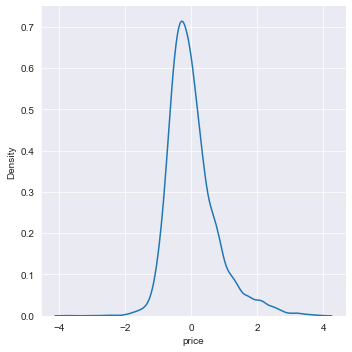

In [50]:
residuals=y_test-y_pred
sns.displot(residuals,kind="kde")

In [51]:
import pickle
pickle.dump(model,open('regmodel.pkl','wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))